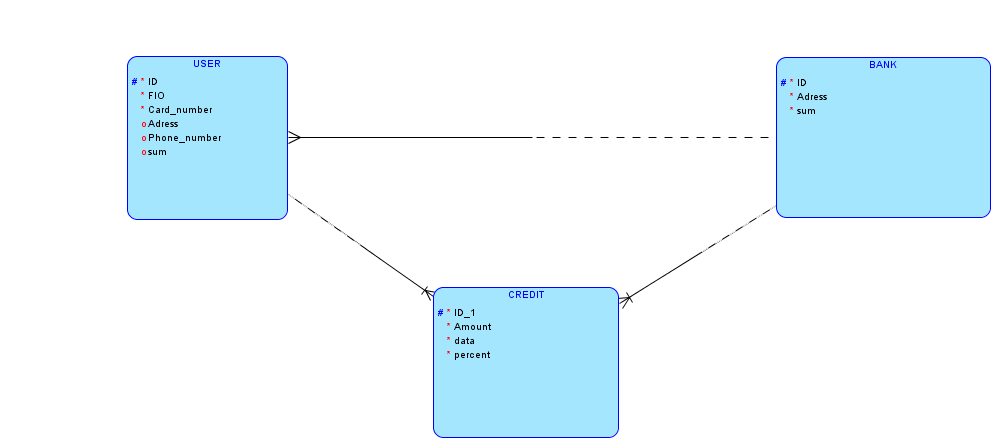

### Таблица USER:
    ID - уникальный идентефикатор
    FIO - ФИО
    Card_number - номер карты
    Adress - адрес проживания
    Phone_number - номер телефона
    sum - сумма на счету

### Таблица BANK:
    ID - уникальный идентефикатор
    Adress - адрес проживания
    sum - касса банка

### Таблица CREDIT:
    ID - уникальный идентефикатор
    Amount - сумма, на которую берётся кредит
    data - дата заключения договора
    percent - процентная ставка

In [2]:
import sqlalchemy
from sqlalchemy import create_engine

engine = create_engine('sqlite:///bank.db')

In [3]:
from sqlalchemy import MetaData
metadata = MetaData()

In [8]:
from sqlalchemy import (MetaData, Table, Column, Integer, Numeric, String, DateTime, Boolean, 
                        ForeignKey, create_engine)
from sqlalchemy import PrimaryKeyConstraint, UniqueConstraint, CheckConstraint
bank = Table('bank', metadata,
             Column('bank_id', Integer(), primary_key=True, nullable=False),
             Column('bank_adress', String(255), nullable=False),
             Column('bank_sum', Integer(), nullable=False),
             PrimaryKeyConstraint('bank_id', name='bank_pk'),
             extend_existing=True
            )

In [11]:
user = Table('user', metadata,
             Column('user_id', Integer(), primary_key=True, nullable=False),
             Column('user_fio', String(255), nullable=False),
             Column('user_card_number', String(255), nullable=False),
             Column('user_sum', Integer(), nullable=False),
             Column('user_adress', String(255)),
             Column('user_phone_number', String(255)),
             Column('bank_id_fk', ForeignKey('bank.bank_id')),
             PrimaryKeyConstraint('user_id', name='user_pk'),
             extend_existing=True
            )

In [15]:
credit = Table('credit', metadata,
               Column('credit_id', Integer(), primary_key=True, nullable=False),
               Column('user_fk', ForeignKey('user.user_id')),
               Column('bank_fk', ForeignKey('bank.bank_id')),
               Column('credit_amount', Integer(), nullable=False),
               Column('credit_date', DateTime(), nullable=False),
               Column('credit_percent', String(20), nullable=False),
               PrimaryKeyConstraint('credit_id', name='credit_pk'),
               extend_existing=True
              )

In [17]:
metadata.create_all(engine)